In [29]:
from preprocessing import batch_generator
from modeling import lstm_model, save_history, plot_metrics
from tensorflow.keras.backend import clear_session
import pandas as pd
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
import os

    1,796,170 samples (bigrams of sentences)

    for each sample length of sample-1 new samples are generated where:
        each word in sample is y,
        and sequence preceding the y word becomes vector x

    setting n_files 2000 for training set and 50 for test set
    n_files * 10240 = 16,384,000 training samples and 512,000 test samples

    with batch size = 256:
        training steps = 80000
        test steps = 2000

In [2]:
with open("max_sequence_len.txt", "r") as file:
    max_sequence_len = int(file.read())
files_dir_train = 'data_final/train/'
files_dir_test = 'data_final/test/'
n_files_train = 1600
n_files_test = 50

vocab_size=80000
batch_size=256

epochs = 24
steps = 8000
val_steps = 250

In [3]:
train_gen = batch_generator(
    files_dir=files_dir_train,
    n_files=n_files_train,
    batch_size=batch_size,
    vocab_size=vocab_size
    )
test_gen = batch_generator(
    files_dir=files_dir_test,
    n_files=n_files_test,
    batch_size=batch_size,
    vocab_size=vocab_size
    )

clear_session()

filepath = 'saved_models/checkpoint.hdf5'
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False)
callbacks = [checkpoint]

model = lstm_model(
    vocab_size=vocab_size,
    max_sequence_len=max_sequence_len,
    D_embed=200,
    D_lstm1=600,
    D_lstm2=300
)
model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 86, 200)           16000200  
_________________________________________________________________
lstm (LSTM)                  (None, 86, 600)           1922400   
_________________________________________________________________
bidirectional (Bidirectional (None, 600)               2162400   
_________________________________________________________________
dense (Dense)                (None, 80001)             48080601  
Total params: 68,165,601
Trainable params: 68,165,601
Non-trainable params: 0
_________________________________________________________________


Epoch 1/24
8000/8000 [==============================] - 4499s 561ms/step - loss: 7.8109 - accuracy: 0.1041 - val_loss: 6.9964 - val_accuracy: 0.1752

Epoch 00001: val_loss improved from inf to 6.99639, saving model to saved_models\model.epoch01-loss7.00.hdf5
Epoch 2/24
8000/8000 [==============================] - 4210s 526ms/step - loss: 6.7886 - accuracy: 0.1813 - val_loss: 6.4243 - val_accuracy: 0.2096

Epoch 00002: val_loss improved from 6.99639 to 6.42430, saving model to saved_models\model.epoch02-loss6.42.hdf5
Epoch 3/24
8000/8000 [==============================] - 3831s 479ms/step - loss: 6.3963 - accuracy: 0.2021 - val_loss: 6.1201 - val_accuracy: 0.2243

Epoch 00003: val_loss improved from 6.42430 to 6.12009, saving model to saved_models\model.epoch03-loss6.12.hdf5
Epoch 4/24
8000/8000 [==============================] - 3870s 484ms/step - loss: 6.1687 - accuracy: 0.2121 - val_loss: 5.9562 - val_accuracy: 0.2314

Epoch 00004: val_loss improved from 6.12009 to 5.95624, saving mo

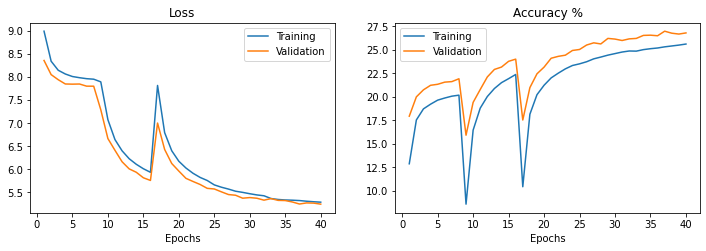

In [4]:
history = model.fit(
    train_gen, epochs=epochs,
    verbose=1,
    steps_per_epoch=steps,
    validation_data=test_gen,
    validation_steps=val_steps,
    callbacks=callbacks
)

model.save('model.h5', save_format='h5')

save_history(history, filename='history.csv')

plot_metrics(filename='history.csv')

# More Training
As there is no confidence whether validation loss has convergence or no, we will continue training for 16 more epochs

In [22]:
with open("max_sequence_len.txt", "r") as file:
    max_sequence_len = int(file.read())
files_dir_train = 'data_final/train/'
files_dir_test = 'data_final/test/'
n_files_train = 1600
n_files_test = 50

vocab_size=80000
batch_size=256

epochs = 16
steps = 8000
val_steps = 250

In [23]:
train_gen = batch_generator(
    files_dir=files_dir_train,
    n_files=n_files_train,
    batch_size=batch_size,
    vocab_size=vocab_size
    )
test_gen = batch_generator(
    files_dir=files_dir_test,
    n_files=n_files_test,
    batch_size=batch_size,
    vocab_size=vocab_size
    )

clear_session()

filepath = 'saved_models/checkpoint.hdf5'
checkpoint = ModelCheckpoint(
    filepath=filepath,
    monitor='val_loss',
    verbose=1,
    save_best_only=True,
    mode='min',
    save_weights_only=False)
callbacks = [checkpoint]

Epoch 1/16
8000/8000 [==============================] - 4753s 594ms/step - loss: 5.3089 - accuracy: 0.2555 - val_loss: 5.2120 - val_accuracy: 0.2695

Epoch 00001: val_loss improved from inf to 5.21204, saving model to saved_models\checkpoint.hdf5
Epoch 2/16
8000/8000 [==============================] - 4961s 620ms/step - loss: 5.2977 - accuracy: 0.2561 - val_loss: 5.2037 - val_accuracy: 0.2710

Epoch 00002: val_loss improved from 5.21204 to 5.20375, saving model to saved_models\checkpoint.hdf5
Epoch 3/16
8000/8000 [==============================] - 5020s 627ms/step - loss: 5.2959 - accuracy: 0.2568 - val_loss: 5.1846 - val_accuracy: 0.2709

Epoch 00003: val_loss improved from 5.20375 to 5.18460, saving model to saved_models\checkpoint.hdf5
Epoch 4/16
8000/8000 [==============================] - 4969s 621ms/step - loss: 5.2939 - accuracy: 0.2563 - val_loss: 5.1726 - val_accuracy: 0.2735

Epoch 00004: val_loss improved from 5.18460 to 5.17264, saving model to saved_models\checkpoint.hdf5


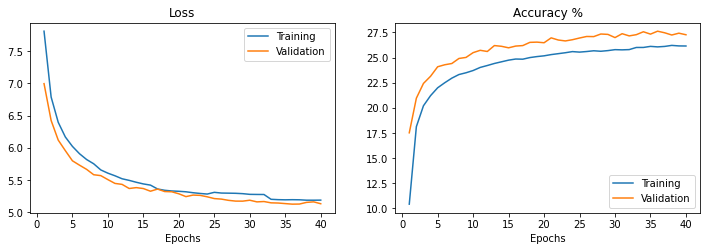

In [24]:
model = load_model('model.h5')

history = model.fit(
    train_gen, epochs=epochs,
    verbose=1,
    steps_per_epoch=steps,
    validation_data=test_gen,
    validation_steps=val_steps,
    callbacks=callbacks
)

model.save('model.h5', save_format='h5')

save_history(history, filename='history.csv')

plot_metrics(filename='history.csv')

# Testing the model

testing thr model with large amount of unseen data

In [30]:
if 'best_model.hdf5' not in os.listdir():
    os.rename('saved_models/checkpoint.hdf5', 'best_model.hdf5')

In [33]:
files_dir_test = 'data_final/test/'

n_files_test = 250 
vocab_size = 80000

test_gen = batch_generator(
    files_dir=files_dir_test,
    n_files=n_files_test,
    batch_size=batch_size,
    vocab_size=vocab_size
    )

# loading model
model = load_model('best_model.hdf5')

results = model.evaluate(test_gen, batch_size=256, steps=1000)
print('\nloss:', results[0], '\naccuracy:', results[1])

1000/1000 [==============================] - 154s 153ms/step - loss: 5.1304 - accuracy: 0.2761

loss: 5.130436420440674 
accuracy: 0.2760937511920929
